In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw = pd.read_csv("Shiller_PE.csv")
df = pd.DataFrame(raw)
df.head()

,Date,S&P Comp Price,Real Price,CAPE (Shiller P/E 10)
0,1871.01,4.44,89.52,NaN
1,1871.02,4.50,88.04,NaN
2,1871.03,4.61,88.87,NaN
3,1871.04,4.74,94.84,NaN
4,1871.05,4.86,99.50,NaN


In [3]:
all_periods = []
for ix, val in enumerate(df["CAPE (Shiller P/E 10)"]):
    if not pd.isnull(val):
        all_periods.append((str(df["Date"][ix]).split("."), df["Real Price"][ix], val))

In [4]:
loss_1_year = []
for ix, month_year in enumerate(all_periods):
    try:
        future_val = all_periods[ix + 12][1]
        pct_change = (future_val - month_year[1]) / month_year[1]
        loss_1_year.append((month_year[0], month_year[2], pct_change))
    except:
        pass

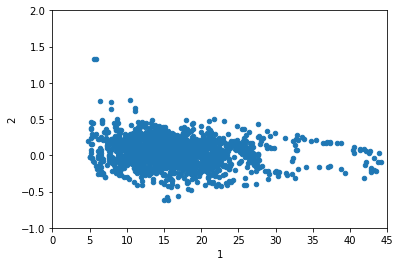

In [5]:
future_change = pd.DataFrame(loss_1_year)
# future_change.head(100)
plot = future_change.plot(1, 2, kind='scatter', xlim=(0,45), ylim=(-1.00, 2))

In [6]:
freq_dict = {
    '<5': [],
    '5-10': [],
    '10-15': [],
    '15-20': [],
    '20-25': [],
    '25-30': [],
    '30-35': [],
    '35-40': [],
    '40-45': [],
#     '45-50': []
}

for val in loss_1_year:
    if val[1] < 5:
        freq_dict['<5'].append(val[2])
    elif val[1] < 10:
        freq_dict['5-10'].append(val[2])
    elif val[1] < 15:
        freq_dict['10-15'].append(val[2])
    elif val[1] < 20:
        freq_dict['15-20'].append(val[2])
    elif val[1] < 25:
        freq_dict['20-25'].append(val[2])
    elif val[1] < 30:
        freq_dict['25-30'].append(val[2])
    elif val[1] < 35:
        freq_dict['30-35'].append(val[2])
    elif val[1] < 40:
        freq_dict['35-40'].append(val[2])
    elif val[1] < 45:
        freq_dict['40-45'].append(val[2])
#     elif val[1] < 50:
#         freq_dict['45-50'].append(val[2])

In [7]:
avg_change = [(key, np.mean(value)) for key, value in freq_dict.items()]
new_df = pd.DataFrame(avg_change)
new_df['PE Ratio'] = [2,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5]
new_df.columns = ['bin', 'average 1-yr return', 'PE Ratio']
new_df

,bin,average 1-yr return,PE Ratio
0,<5,0.203718,2.0
1,5-10,0.087301,7.5
2,10-15,0.065944,12.5
3,15-20,0.012314,17.5
4,20-25,0.013479,22.5
5,25-30,0.029879,27.5
6,30-35,-0.016930,32.5
7,35-40,0.039134,37.5
8,40-45,-0.054281,42.5


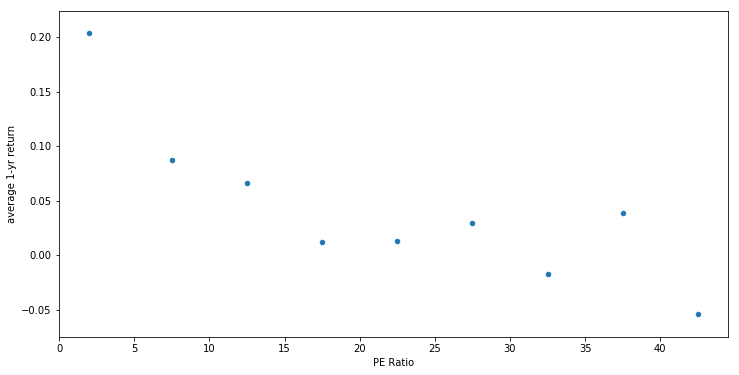

In [8]:

new_df.plot('PE Ratio',1, kind='scatter', figsize=(12,6))


In [9]:
loss_10_year = []
for ix, month_year in enumerate(all_periods):
    try:
        future_val = all_periods[ix + 120][1]
        pct_change = (future_val - month_year[1]) / month_year[1]
        loss_10_year.append((month_year[0], month_year[2], pct_change))
    except:
        pass

In [10]:
freq_dict_10 = {
    '<5': [],
    '5-10': [],
    '10-15': [],
    '15-20': [],
    '20-25': [],
    '25-30': [],
    '30-35': [],
    '35-40': [],
    '40-45': [],
#     '45-50': []
}

for val in loss_10_year:
    if val[1] < 5:
        freq_dict_10['<5'].append(val[2])
    elif val[1] < 10:
        freq_dict_10['5-10'].append(val[2])
    elif val[1] < 15:
        freq_dict_10['10-15'].append(val[2])
    elif val[1] < 20:
        freq_dict_10['15-20'].append(val[2])
    elif val[1] < 25:
        freq_dict_10['20-25'].append(val[2])
    elif val[1] < 30:
        freq_dict_10['25-30'].append(val[2])
    elif val[1] < 35:
        freq_dict_10['30-35'].append(val[2])
    elif val[1] < 40:
        freq_dict_10['35-40'].append(val[2])
    elif val[1] < 45:
        freq_dict_10['40-45'].append(val[2])

In [11]:
avg_change_10 = [(key, np.mean(value)) for key, value in freq_dict_10.items()]
new_df_10 = pd.DataFrame(avg_change_10)
new_df_10['PE Ratio'] = [2,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5]
new_df_10.columns = ['bin', 'average 10-yr return', 'PE Ratio']
new_df_10

,bin,average 10-yr return,PE Ratio
0,<5,1.744360,2.0
1,5-10,0.884003,7.5
2,10-15,0.436994,12.5
3,15-20,0.279407,17.5
4,20-25,0.039458,22.5
5,25-30,0.255556,27.5
6,30-35,-0.045871,32.5
7,35-40,-0.211461,37.5
8,40-45,-0.422822,42.5


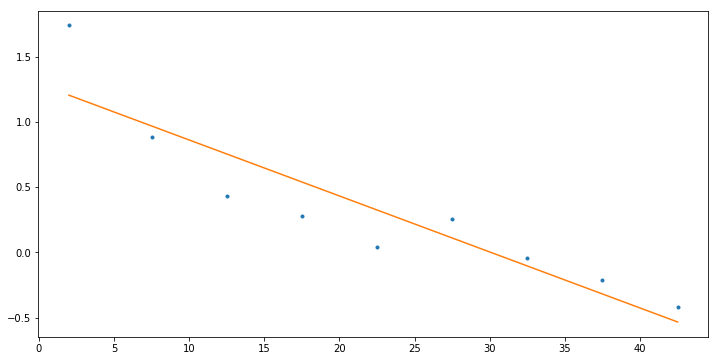

In [15]:
# Fit with polyfit
x = new_df_10['PE Ratio']
y = new_df_10['average 10-yr return']
b, m = polyfit(x, y, 1)

plt.figure(figsize=(12,6))
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

# new_df_10.plot('PE Ratio',1, kind='scatter', figsize=(12,6))
